# THE SPARKS FOUNDATION 
# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

## TASK 4: EXPLORATORY DATA ANALYSIS (GLOBAL TERRORISM)
## Name: Haridharani AS

In [80]:
#importing the libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
#importing the dataset
os.chdir("C:\\Users\\User\\Downloads")
os.getcwd()

'C:\\Users\\User\\Downloads'

In [82]:
df=pd.read_csv("globalterrorism.csv",encoding='latin-1')
print("Dataset is imported")

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Dataset is imported


In [83]:
df.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# DATA CLEANING

In [84]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [85]:
#No.of Rows and Columns
df.shape

(181691, 135)

In [86]:
#column names
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [105]:
#Changing the column names
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                  'region_txt':'Region','attacktype1_txt':'Attack_type','target1':'Target','nkill':'Killed',
                  'nwound':'wounded', 'gname':'Group','targettype1_txt':'Target_type','weaptype1_txt':'Weapon_Type'},
          inplace=True)

In [88]:
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [89]:
#Missing Values
missing_values=df.isnull().sum()
missing_values

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [90]:
np.product(df.shape)

24528285

In [91]:
#percentage of missing values
missing_percentage=missing_values.sum()/24528285
missing_percentage*100

56.481718962414206

In [92]:
#High number of missing values
#dropping columns with missing values
df_dropped=df.dropna(axis=1)

In [93]:
df_dropped.head(3)

,eventid,Year,Month,Day,extended,country,Country,region,Region,vicinity,...,Group,individual,weaptype1,Weapon_Type,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1


In [94]:
#Total columns Vs Columns dropped
print("Total columns in dataset= %d \n" % df.shape[1])
print("Total columns dropped= %d \n" % df_dropped.shape[1])

Total columns in dataset= 135 

Total columns dropped= 29 



In [109]:
df=df[['Year','Month','Day','Country','State','Region','city','latitude','longitude','Attack_type','Killed',
      'wounded','Target','summary','Group','Weapon_Type','motive']]

In [110]:
#filling the missing values
df['wounded']=df['wounded'].fillna(0).astype(int)
df['Killed']=df['Killed'].fillna(0).astype(int)

# DATA INSIGHTS

In [124]:
#Most Attacks
country=df['Country'].value_counts().idxmax()
print('Most attacked country is', country)

city=df['city'].value_counts().index[1]
print('Most attacked city is', city)

region=df['Region'].value_counts().idxmax()
print('Most attacked region is', region)

Most attacked country is Iraq
Most attacked city is Baghdad
Most attacked region is Middle East & North Africa


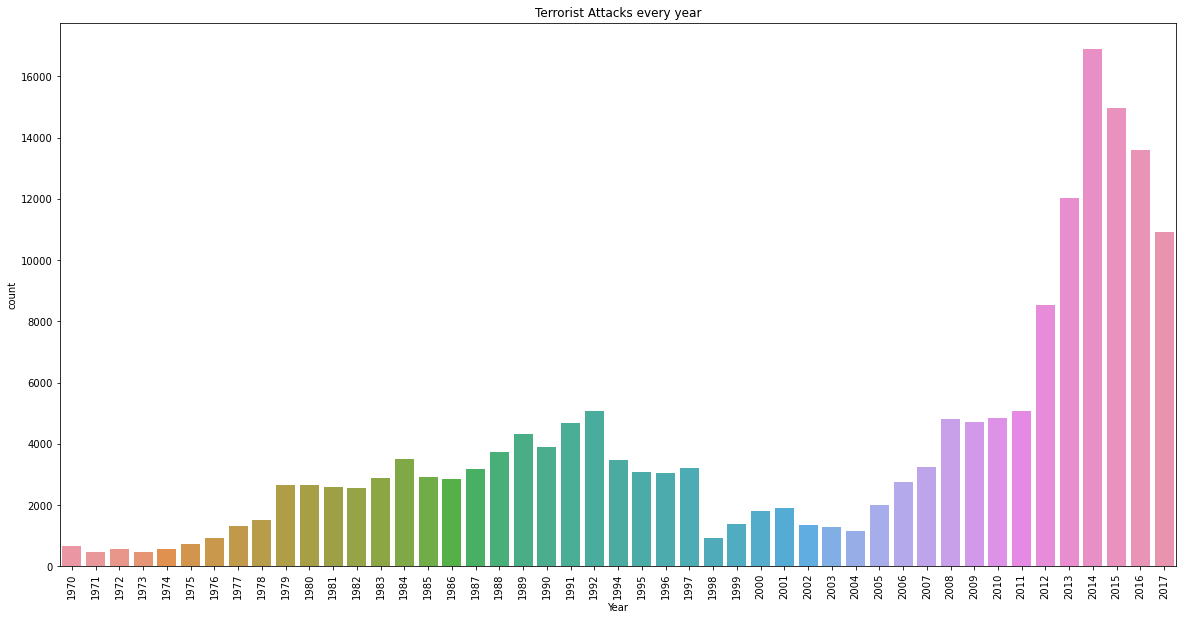

In [132]:
#Terrorist attacks every year
plt.subplots(figsize=(20,10))
sns.countplot('Year', data=df)
plt.xticks(rotation=90)
plt.title("Terrorist Attacks every year")
plt.show()

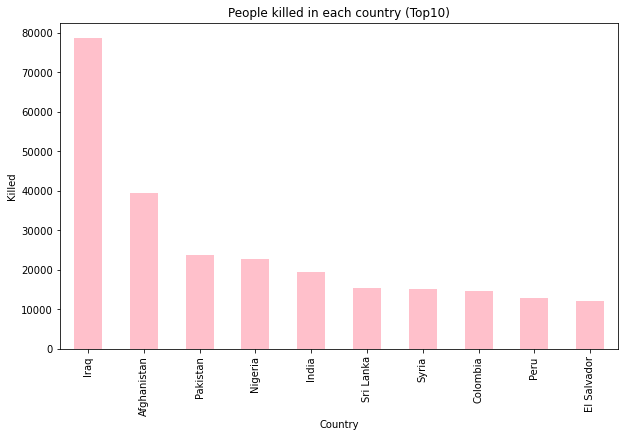

In [136]:
#People killed in each country (Top 10)
plt.subplots(figsize=(10,6))
df.groupby(['Country'])['Killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='pink')
plt.xticks(rotation=90)
plt.ylabel('Killed')
plt.title("People killed in each country (Top10)")
plt.show()

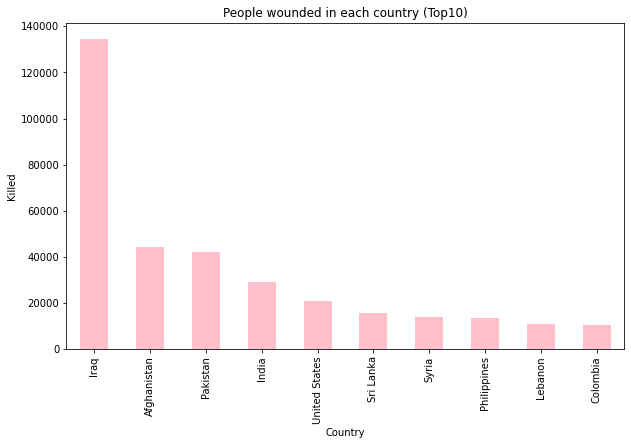

In [142]:
#People wounded in each country (Top 10)
plt.subplots(figsize=(10,6))
df.groupby(['Country'])['wounded'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='pink')
plt.xticks(rotation=90)
plt.ylabel('Killed')
plt.title("People wounded in each country (Top10)")
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default ba

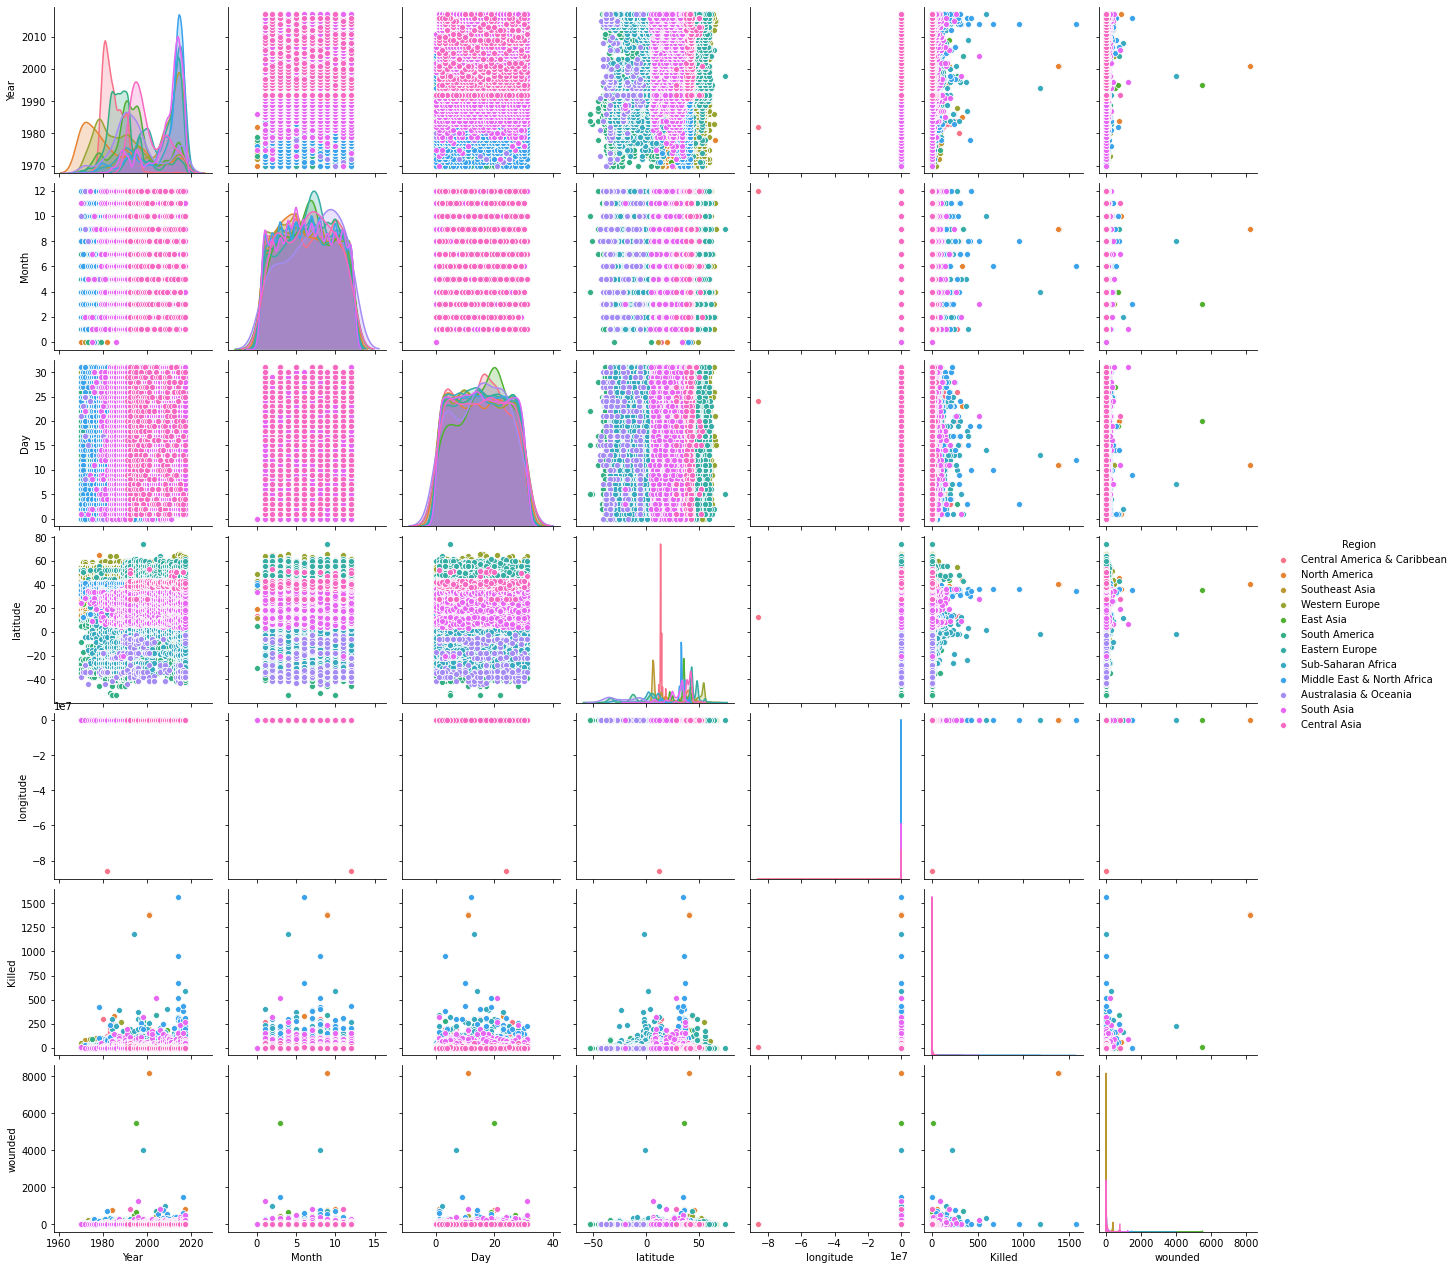

In [144]:
#wounded and killed ratio in Region
sns.pairplot(df,hue='Region')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default ba

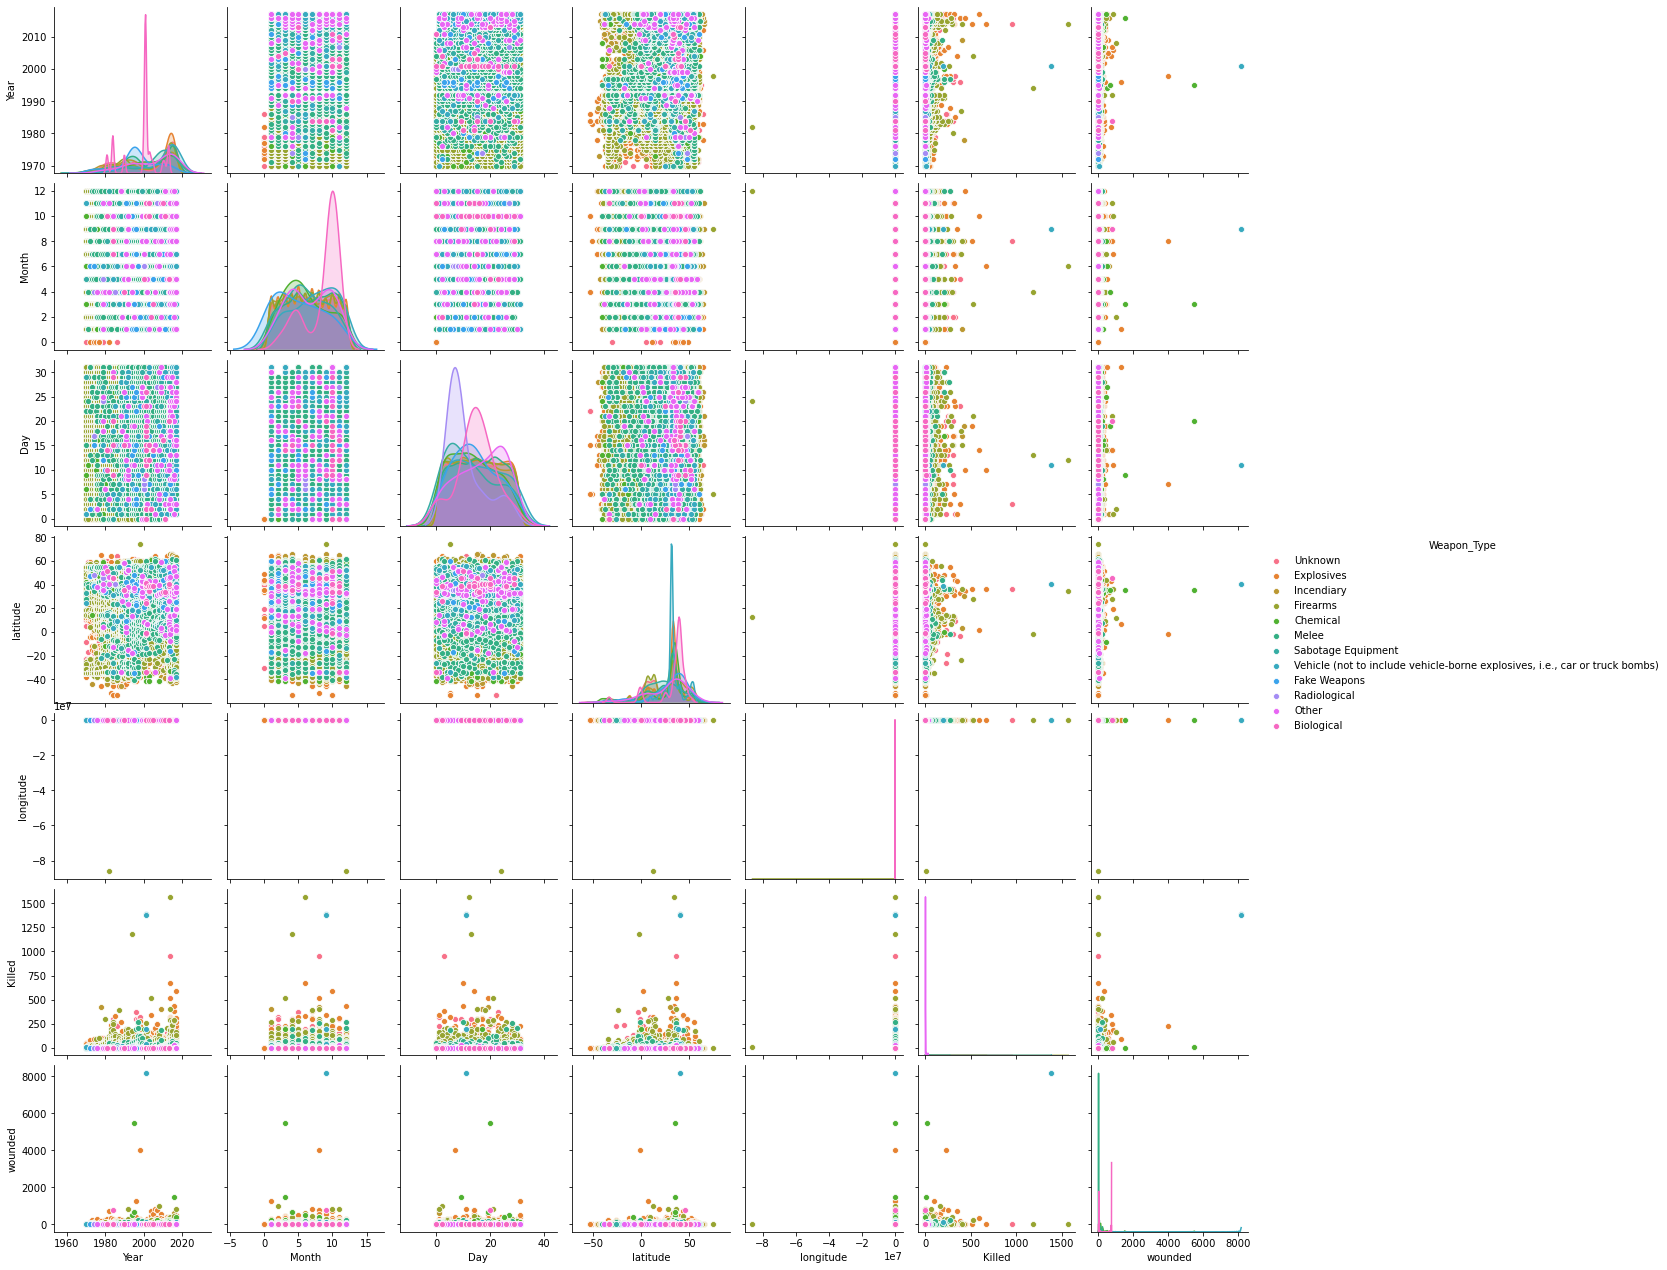

In [145]:
#wounded and killed ratio by Weapon type
sns.pairplot(df,hue='Weapon_Type')

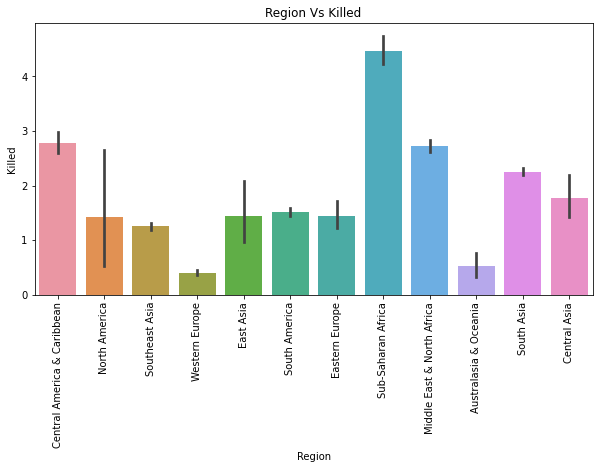

In [147]:
#Region Vs Killed
plt.subplots(figsize=(10,5))
sns.barplot(x='Region',y='Killed', data=df)
plt.xticks(rotation=90)
plt.ylabel("Killed")
plt.title("Region Vs Killed")
plt.show()

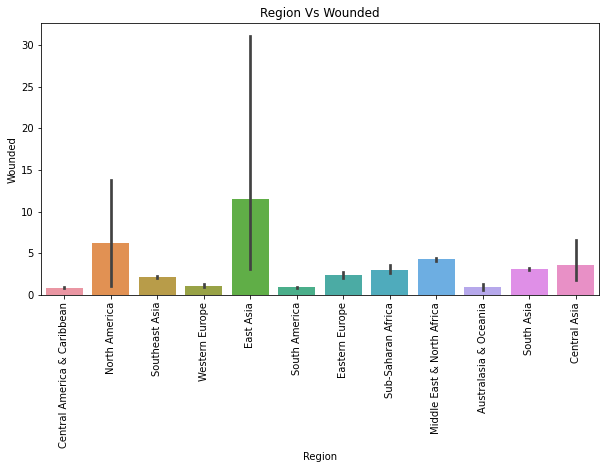

In [148]:
#Region Vs Wounded
plt.subplots(figsize=(10,5))
sns.barplot(x='Region',y='wounded', data=df)
plt.xticks(rotation=90)
plt.ylabel("Wounded")
plt.title("Region Vs Wounded")
plt.show()

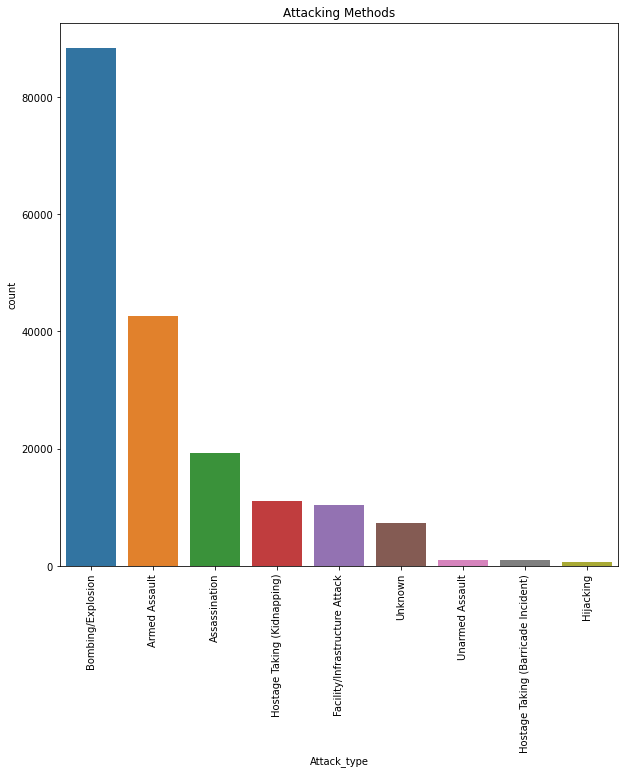

In [151]:
#Attacking Methods
plt.subplots(figsize=(10,10))
sns.countplot('Attack_type', data=df, order=df['Attack_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Attacking Methods")
plt.show()

# Conclusion

# 1) Middle East and North America are the most affected regions
# 2)The Most attacked country is Iraq
# 3) The Most attacked city is Baghdad
# 4) Killed Rate is higher in Iraq
# 5) Bombing and Explosion is the most used attacking methods